In [1]:
import pickle, os
import numpy as np

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from software.MantidData import mantidOutput

root_path = os.getcwd()+'/'

### Reading Exper data and Exp_setup for simulation
def generate_exp_k_path(path_descriptions):
    'path description: list(K_path: str([[h1,k1,l1], [h2,k2,l2]]), Value: np.ndarray([h_value, k_value ,l_vaule]), grid: int(number))'
    'example usage: ["[[-h-1, 0, 0.5], [0, k+1, 0.5]]", [1, 1, 0], 300]] or ["[[1, -k, 0.5], [1, k, 0.5]]", [0, 2, 0], 300]'

    desc = path_descriptions[0]
    Kv = path_descriptions[1]
    path = eval(desc, {"h": Kv[0], "k": Kv[1], "l": Kv[2]})
    path.append(path_descriptions[2])

    return path

paths = ["[[1, -k, 0.5], [1, k, 0.5]]", "[[-h, 2, 0.5], [h, 2, 0.5]]", "[[-h-1, 0, 0.5], [0, k+1, 0.5]]"]

### In future the "txt file" can be subsitute to the experiment measurement function or the interface to the equipment
Expr = {0:{'Exp_info':['1K0E_slice_rotation_Ei70meV_5K.txt', paths[0]]}, 1:{'Exp_info':['H20E_slice_rotation_Ei70meV_5K.txt', paths[1]]}, 2:{'Exp_info':['Hm1Hp10E_slice_rotation_Ei70meV_5K.txt', paths[2]]}}

### part for furture application
Expr_grid = [None, None] #[Energy_grid, Kpath_grid]
ori_res = []
for i in Expr.keys():
    testfile = f"{root_path}files/data/{Expr[i]['Exp_info'][0]}"
    MO = mantidOutput(testfile)
    K = max(np.abs(np.min(np.round(MO.XX, 4))), np.abs(np.max(np.round(MO.XX, 4))))
    Expr[i]['Exp_info'].append(K)
    Expr[i]['Exp_Kgrid'] = [generate_exp_k_path([Expr[i]['Exp_info'][1], [K,K,K], len(MO.XX) if Expr_grid[0] is None else Expr_grid[0]]), K]
    Expr[i]['Exp_Egrid'] = [np.min(np.round(MO.YY, 4)), np.max(np.round(MO.YY, 4)), len(MO.YY) if Expr_grid[1] is None else Expr_grid[1]]
    ori_res.append(MO.II)

### Simulation_setup
img_shape = [500, 500] #[Energy_grid, Kpath_grid]
exp_img_shape = [[Expr[i]['Exp_Egrid'][2], Expr[i]['Exp_Kgrid'][0][2]] for i in Expr.keys()]

print(exp_img_shape)

# simulation Q and E for SpinW Simulation
Q_paths = [[Expr[i]['Exp_Kgrid'][0][0], Expr[i]['Exp_Kgrid'][0][1], img_shape[1]] for i in Expr.keys()] 
E_grid = [[Expr[i]['Exp_Egrid'][0], Expr[i]['Exp_Egrid'][1], img_shape[0]] for i in Expr.keys()]
energy_range = [[Expr[i]['Exp_Egrid'][0], Expr[i]['Exp_Egrid'][1]] for i in Expr.keys()]

# Experiment Q and E
Exp_Q_paths = [Expr[i]['Exp_Kgrid'][0] for i in Expr.keys()]
Exp_E_paths = [Expr[i]['Exp_Egrid'] for i in Expr.keys()]

Qpaths_num = len(Q_paths)
print(Qpaths_num)

standard_array = np.array([-1.9034,-3.3792,-1.6698,-0.0933,-0.0896,0.3665,-0.2932,0.31,3.0])

[[87, 60], [87, 64], [87, 40]]
3


['-1.9034', '-3.3792', '-1.6698', '-0.0933', '-0.0896', '0.3665', '-0.2932', '0.31', '3.0']


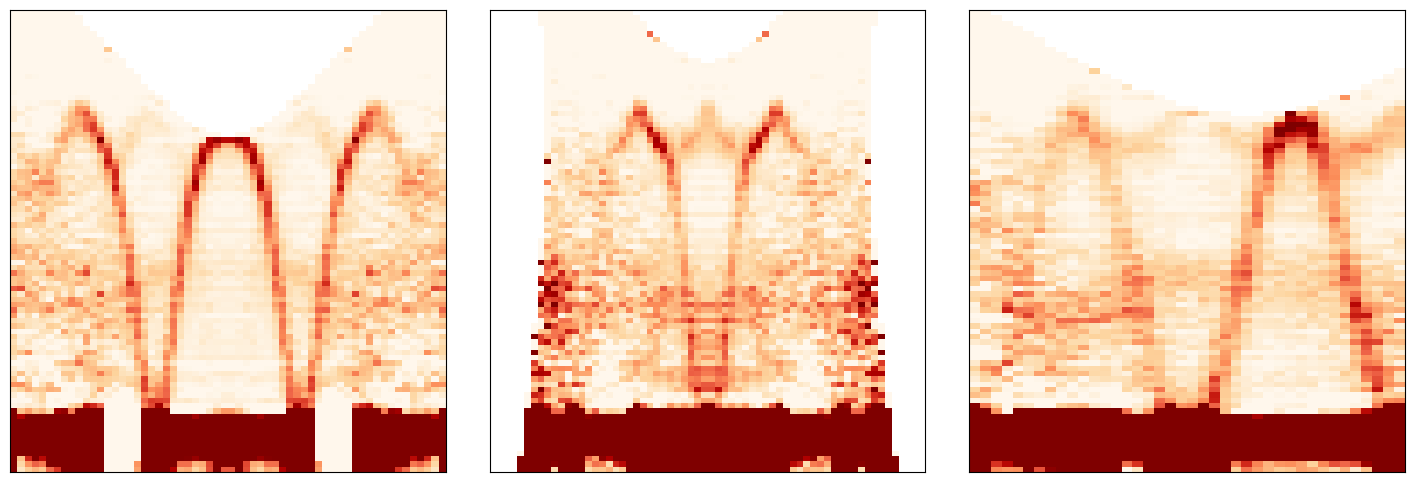

In [2]:
print([str(i) for i in standard_array])
fig, ax = plt.subplots(nrows=1, ncols=Qpaths_num, figsize=(6*Qpaths_num,6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})

if Qpaths_num == 1:
    ax.imshow(ori_res[i], aspect=0.6, vmax=0.04, cmap='OrRd')
    ax.set_xticks([])
    ax.set_yticks([])
else:
    for i in range(Qpaths_num):
        ax[i].imshow(np.flipud(ori_res[i]), aspect='auto', vmin=0, vmax=0.0001, cmap='OrRd')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
plt.show()

['-1.9034', '-3.3792', '-1.6698', '-0.0933', '-0.0896', '0.3665', '-0.2932', '0.31', '3.0']


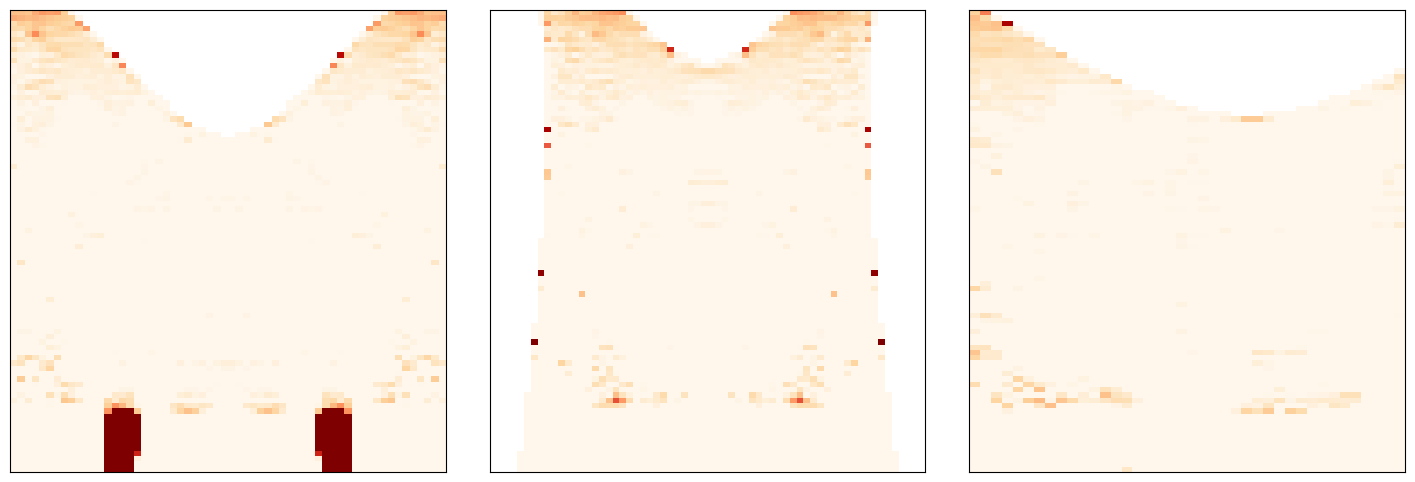

In [3]:
## minus plot

print([str(i) for i in standard_array])
fig, ax = plt.subplots(nrows=1, ncols=Qpaths_num, figsize=(6*Qpaths_num,6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})

if Qpaths_num == 1:
    ax.imshow(-ori_res[i], aspect=0.6, vmax=0.04, cmap='OrRd')
    ax.set_xticks([])
    ax.set_yticks([])
else:
    for i in range(Qpaths_num):
        ax[i].imshow(np.flipud(-ori_res[i]), aspect='auto', vmin=0, vmax=0.0001, cmap='OrRd')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
plt.show()

In [4]:
class IO(object):
    
    def __init__(self, root_path, expr_num, experiment=Expr, img_shape=img_shape, output_file_name='out.pickle', sample_file='SW_point.txt'):

        # simulation Q and E for SpinW Simulation

        print(f"expr_num:{expr_num}")
        Expr = experiment[expr_num]
        Q_paths = [Expr['Exp_Kgrid'][0][0], Expr['Exp_Kgrid'][0][1], img_shape[1]] 
        E_grid = [Expr['Exp_Egrid'][0], Expr['Exp_Egrid'][1], img_shape[0]]
        
        # Experiment Q and E
        Exp_Q_paths = Expr['Exp_Kgrid'][0]
        Exp_E_paths = Expr['Exp_Egrid']
        
        self.root_path = root_path
        self.expr_num = expr_num
        self.experiment = Expr
        self.K = Expr['Exp_Kgrid'][1]
        self.simu_Q = Q_paths
        self.simu_E = E_grid
        self.expr_Q = Exp_Q_paths
        self.expr_E = Exp_E_paths
        self.output_file_name = output_file_name
        self.sample_file = sample_file

    def read_output(self, folder):

        with open(f'{self.root_path}{folder}/{self.output_file_name}', 'rb') as file:
            para, sw = pickle.load(file)

        return para, sw

    def read_experimet(self):
        
        expfile = f"{root_path}files/data/{self.experiment['Exp_info'][0]}"
        MO = mantidOutput(expfile)

        return MO.II

    def read_SW(self):
        
        with open(f'{self.root_path}{self.expr_num}_{self.sample_file}', 'r') as f:
            SWl = f.readlines()
        
        X = []
        Y = []
        itercount = []
        for num,i in enumerate(SWl):
            info = i.split()
            _x = [float(info[0]), float(info[1])]
            X.append(_x)
            Y.append(float(info[2]))
            if int(info[3])==0:
                itercount.append(num)

        norm_X = np.array(X)
        norm_Y = np.array(Y)

        return [norm_X, norm_Y, itercount]
    
    def data_index_transformation(self, data, direction='expdata_2_simuindex'):
        '''Currently only serves for index transformation to (0,500) and (0,300)'''
        '''The index range is changing with the Quanty input settings'''
        '''input 2*N --> output 2*N'''
        '''data type numpy N*2 matrix [(x0_1,x0_2), (x1_1,x1_2), ...]''' 
        '''data format: [Energy, K]'''
        
        if type(data)!=np.ndarray:
            data = np.array(data)
            
        if len(data.shape) < 2:
            data = np.expand_dims(data, axis=0)
            
        new_array = np.zeros(data.shape)

        ### for Hamiltonian fitting, to get simu_index from experiment [Energy, Q]
        if direction == 'expdata_2_simuindex':     
            assert (self.simu_E[0] <= data[:,0]).all() and (data[:,0] <= self.simu_E[1]).all()
            assert (-self.K <= data[:,1]).all() and (data[:,1] <= self.K).all()
            
            # 1. Exp energy to simu index and Exp Kgrid to simu index
            energy_to_simu_index = (data[:,0]-self.simu_E[0])/(self.simu_E[1]-self.simu_E[0])*self.simu_E[2]
            Q_to_simu_index = (data[:,1]-(-self.K))/(self.K-(-self.K))*self.simu_Q[2]
            
            new_array[:,0] = np.array([np.around(i, 0) for i in energy_to_simu_index])
            new_array[:,1] = np.array([np.around(i, 0) for i in Q_to_simu_index])
            
        ### for sampling [energy, K], to get experiment [Energy, Q] from simu_index
        elif direction == 'simuindex_2_expdata':
            assert (data[:,0] <= self.simu_E[2]).all() and (data[:,1] <= self.simu_Q[2]).all()
            
            # 2. simu index to Exp energy and simu index to Exp Kgrid
            simu_index_to_energy = (data[:,0]/self.simu_E[2])*(self.simu_E[1]-self.simu_E[0])+self.simu_E[0]
            simu_index_to_Q = (data[:,1]/self.simu_Q[2])*(self.K-(-self.K))-self.K

            new_array[:,0] = simu_index_to_energy
            new_array[:,1] = simu_index_to_Q

        ### for mimic the experiment measurement, may be deprecated in furture version when access to real experimental test
        elif direction == 'expdata_2_expindex':
            assert (self.expr_E[0] <= data[:,0]).all() and (data[:,0] <= self.expr_E[1]).all()
            assert (-self.K <= data[:,1]).all() and (data[:,1] <= self.K).all()

            # 3. Exp energy to Exp index and Exp Kgrid to Exp index
            energy_to_expr_index = (data[:,0]-self.expr_E[0])/(self.expr_E[1]-self.expr_E[0])*self.expr_E[2]
            Q_to_expr_index = (data[:,1]-(-self.K))/(self.K-(-self.K))*self.expr_Q[2]
            
            new_array[:,0] = np.array([np.around(i, 0) for i in energy_to_expr_index])
            new_array[:,1] = np.array([np.around(i, 0) for i in Q_to_expr_index])

        elif direction == 'expindex_2_expdata':
            assert (data[:,0] <= self.expr_E[2]).all() and (data[:,1] <= self.expr_Q[2]).all()
            
            # 2. Exp index to Exp energy and Exp index to Exp Kgrid
            expr_index_to_energy = (data[:,0]/self.expr_E[2])*(self.expr_E[1]-self.expr_E[0])+self.expr_E[0]
            expr_index_to_Q = (data[:,1]/self.expr_Q[2])*(self.K-(-self.K))-self.K

            new_array[:,0] = expr_index_to_energy
            new_array[:,1] = expr_index_to_Q

        return new_array


1
expr_num:0
(500, 500)
expr_num:1
(500, 500)
expr_num:2
(500, 500)


/tmp/ipykernel_1845887/2239361342.py:80: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


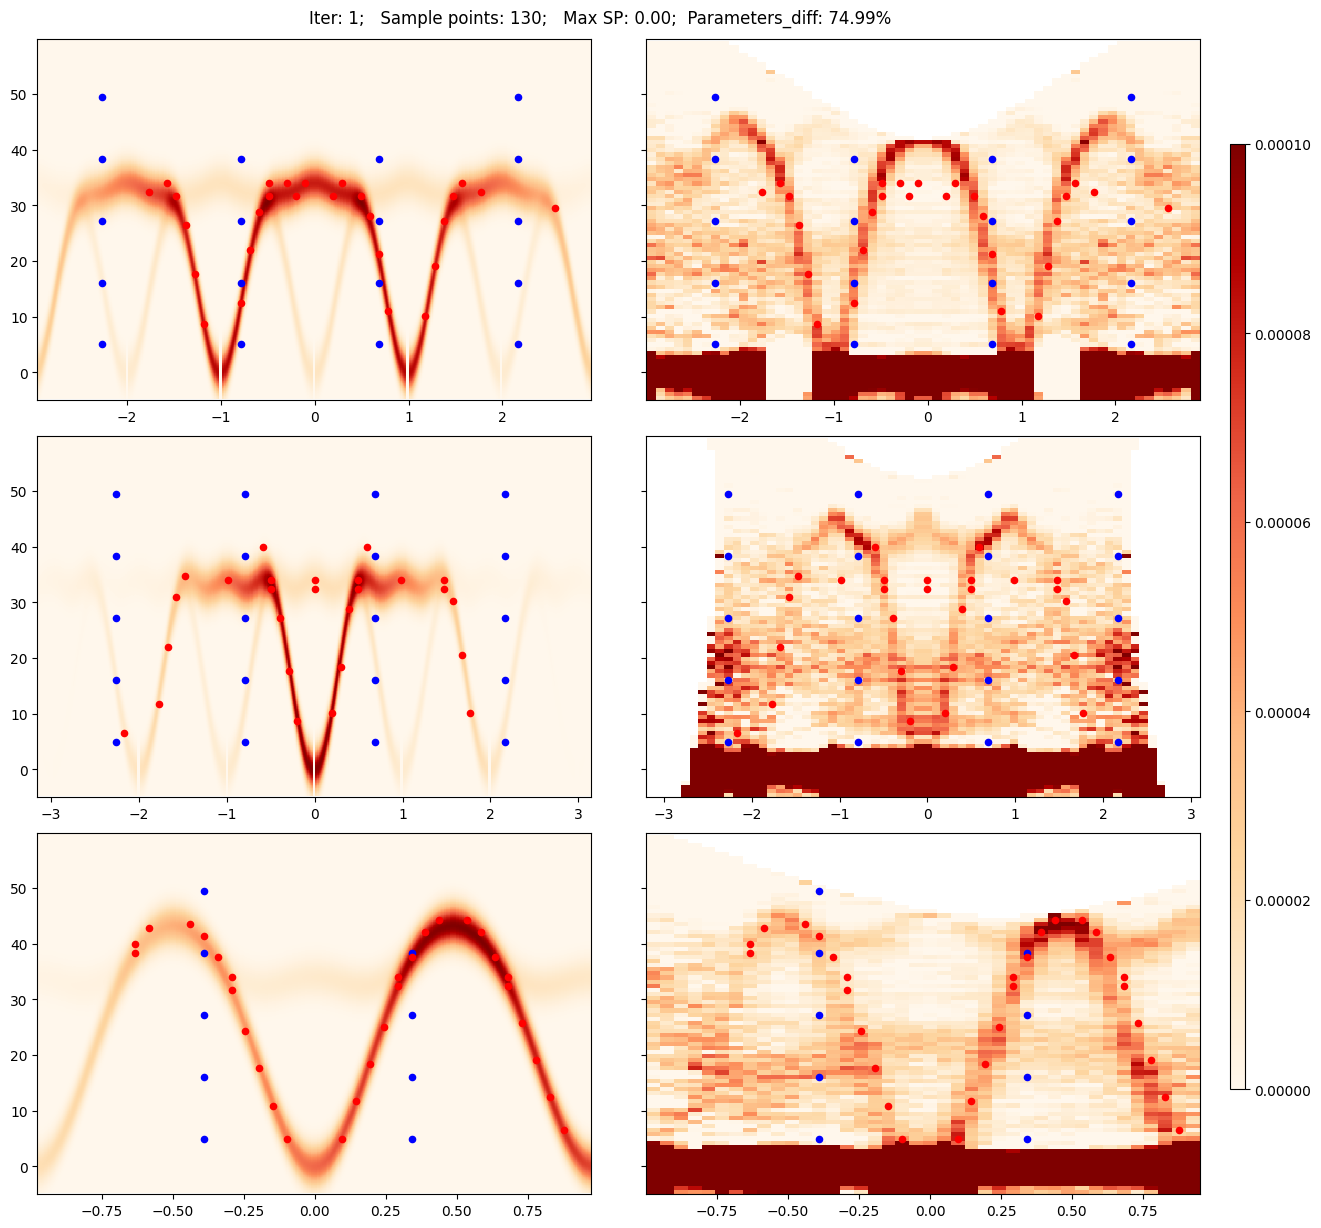

2
expr_num:0
(500, 500)
expr_num:1
(500, 500)
expr_num:2
(500, 500)


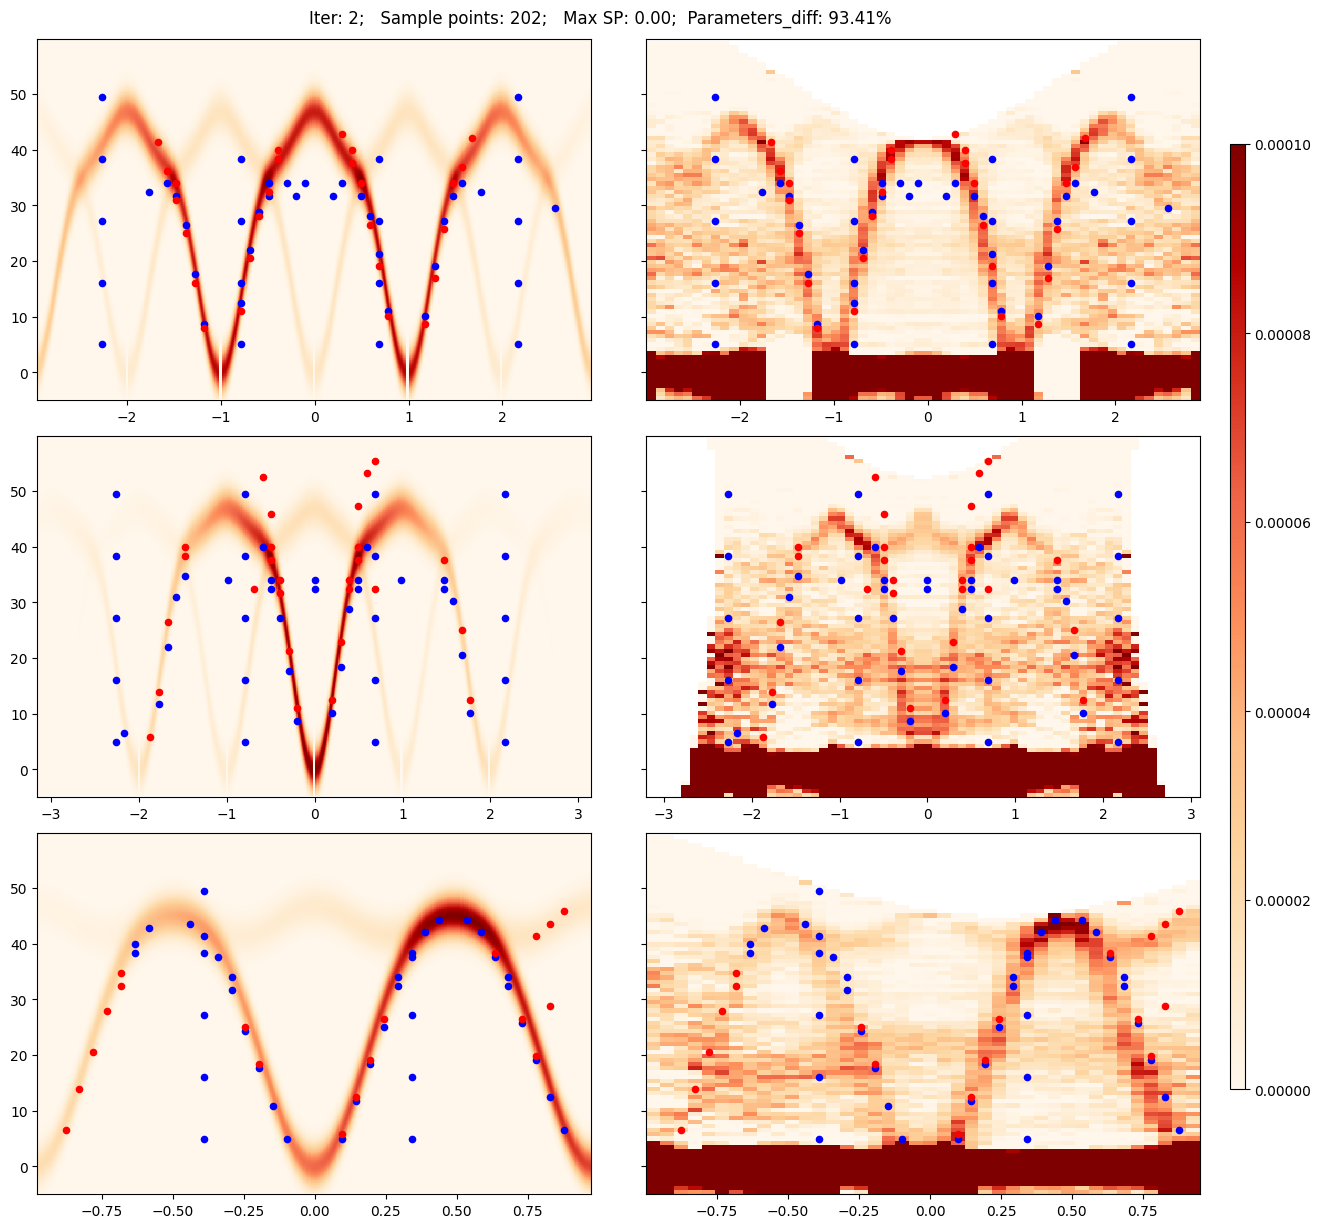

3
expr_num:0
(500, 500)
expr_num:1
(500, 500)
expr_num:2
(500, 500)


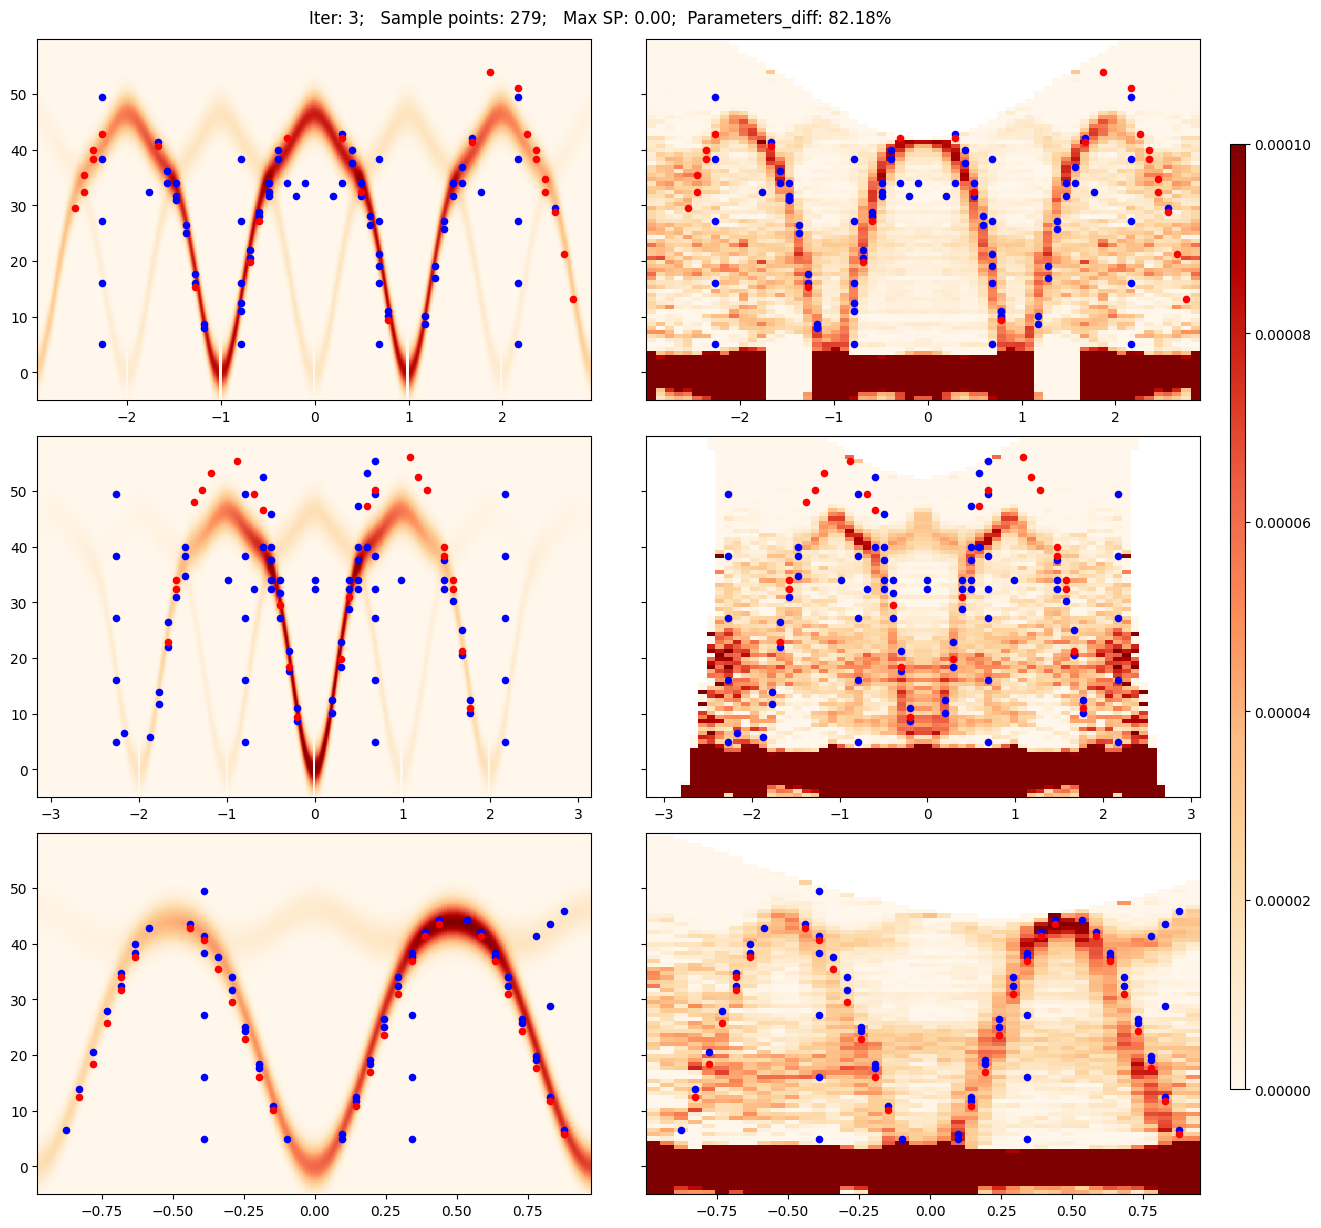

In [13]:
root = os.getcwd()+'/'
t_name = root.split('/')[-2]
#root = f'/work/projects/p0020541/Yixuan/SpinWave/{t_name}/'
number = int(os.popen(f'cat {root}para_results.txt | wc -l').read())
cmap = 'OrRd'
dev = 0

images = []
#for num in range(max(1, number-2), number+1):
for num in range(1, number-dev+1):

    print(num)
    
    fig, ax = plt.subplots(nrows=Qpaths_num, ncols=2, figsize=(15,15/3*Qpaths_num), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})

    final_max = 0.0001
    total_sample_num = 0
    sample_max = []
    total_diff = []
    
    for i in range(Qpaths_num):

        io = IO(root, i)

        samples = io.read_SW()
        sampling_num = samples[2][num+1] if num<number-dev else len(samples[1])
        sample_max.append(np.max(samples[1][:sampling_num]))
        total_sample_num += sampling_num
        
        para, _RIXS = io.read_output(f'parameters/{num+dev}')
        RIXS = _RIXS[i]
        print(RIXS.shape)
        RIXS_energy = (np.arange(RIXS.shape[0])/io.simu_E[2])*(io.simu_E[1]-io.simu_E[0])+io.simu_E[0]
        RIXS_Q = ((np.arange(RIXS.shape[1]+1)/io.simu_Q[2])*(io.K-(-io.K))-io.K)[:-1]

        #print(RIXS_energy.shape, RIXS_Q.shape)
        
        ori = io.read_experimet()
        #print(ori.shape)
        ori_energy = (np.arange(ori.shape[0])/io.expr_E[2])*(io.expr_E[1]-io.expr_E[0])+io.expr_E[0]
        ori_Q = ((np.arange(ori.shape[1]+1)/io.expr_Q[2])*(io.K-(-io.K))-io.K)[:-1]
        #print(ori_energy.shape, ori_Q.shape)
        
        
        para_diff = np.mean(np.abs(para-standard_array)/np.abs(standard_array))
        #para_diff = np.mean(np.abs(para-standard_array))
        
        #diff = abs(RIXS-ori)
        #total_diff.append(diff)
        
        #ax[i][0].imshow(RIXS, aspect='auto', vmin=0, vmax=final_max, cmap='OrRd')
        ax[i][0].pcolormesh(RIXS_Q, RIXS_energy, RIXS, vmin=0, vmax=np.max(RIXS), cmap=cmap)
        ax[i][0].scatter(samples[0][:,1][:samples[2][num]], samples[0][:,0][:samples[2][num]], s=20, c='blue')
        ax[i][0].scatter(samples[0][:,1][samples[2][num]:sampling_num], samples[0][:,0][samples[2][num]:sampling_num], s=20, c='r')
        # ax[i][0].set_xticks([])
        # ax[i][0].set_yticks([])
    
        #im = ax[i][1].imshow(ori, aspect='auto', vmin=0, vmax=final_max, cmap='OrRd')
        im = ax[i][1].pcolormesh(ori_Q, ori_energy, ori, vmin=0, vmax=final_max, cmap=cmap)
        ax[i][1].scatter(samples[0][:,1][:samples[2][num]], samples[0][:,0][:samples[2][num]], s=20, c='blue')
        ax[i][1].scatter(samples[0][:,1][samples[2][num]:sampling_num], samples[0][:,0][samples[2][num]:sampling_num], s=20, c='r')
        # ax[i][1].set_xticks([])
        # ax[i][1].set_yticks([])
    
        # ax[i][2].imshow(diff, aspect='auto', vmax=final_max, cmap='OrRd')
        # ax[i][2].scatter(samples[0][:,1][samples[2][num]:sampling_num], samples[0][:,0][samples[2][num]:sampling_num], s=12, c='r')
        # ax[i][2].set_xticks([])
        # ax[i][2].set_yticks([])
    
    cbar_ax = fig.add_axes([0.92, 0.18, 0.01, 0.63])  # 这里的数字分别代表[left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax)
    # fig.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)
    # cbar = fig.colorbar(im, ax=ax, fraction=0.04, pad=0.04)
    
    #label = f'Iter: {num};   Sample points: {total_sample_num};   Max SP: {np.max(sample_max):.2f};   Mean and Std fitting different: {np.mean(total_diff):.7f}, {np.std(total_diff):.7f};   Parameters_diff: {para_diff*100:.2f}%'
    label = f'Iter: {num};   Sample points: {total_sample_num};   Max SP: {np.max(sample_max):.2f};  Parameters_diff: {para_diff*100:.2f}%'
    fig.suptitle(label, fontsize=12, y=0.9)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(Image.fromarray(image))
    
    plt.show()

images[0].save(f'SPINW.gif', save_all=True, append_images=images[1:], duration=1000, loop=0)

/work/projects/p0020541/Yixuan/SpinWave/Experment_test0


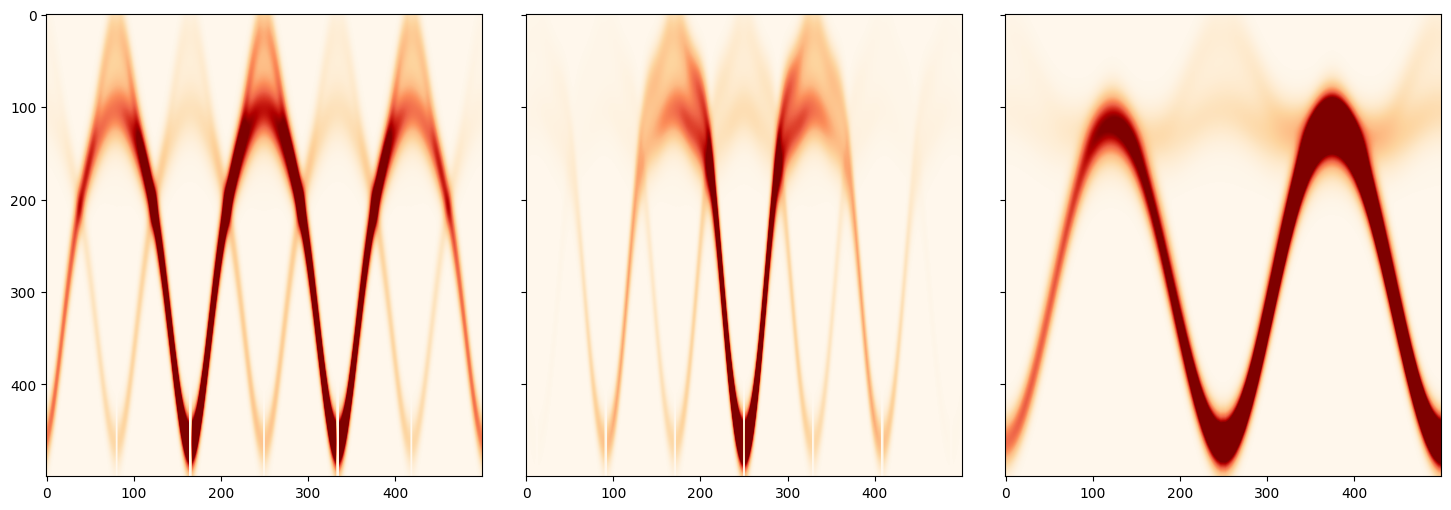

In [14]:
path = os.getcwd()
print(path)
with open(f'{path}/parameters/{num}/stat_model.pickle', 'rb') as file:
    p_res = pickle.load(file)
    
fig, ax = plt.subplots(nrows=1, ncols=Qpaths_num, figsize=(6*Qpaths_num,6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})

if Qpaths_num == 1:
    ax.imshow(p_res[i][0], aspect=0.6, cmap='OrRd')
    ax.set_xticks([])
    ax.set_yticks([])
else:
    for i in range(Qpaths_num):
        ax[i].imshow(np.flipud(p_res[i][0]), aspect='auto', vmin=0, vmax=0.01, cmap='OrRd')
        # ax[i].set_xticks([])
        # ax[i].set_yticks([])
plt.show()

/work/projects/p0020541/Yixuan/SpinWave/Experment_test0


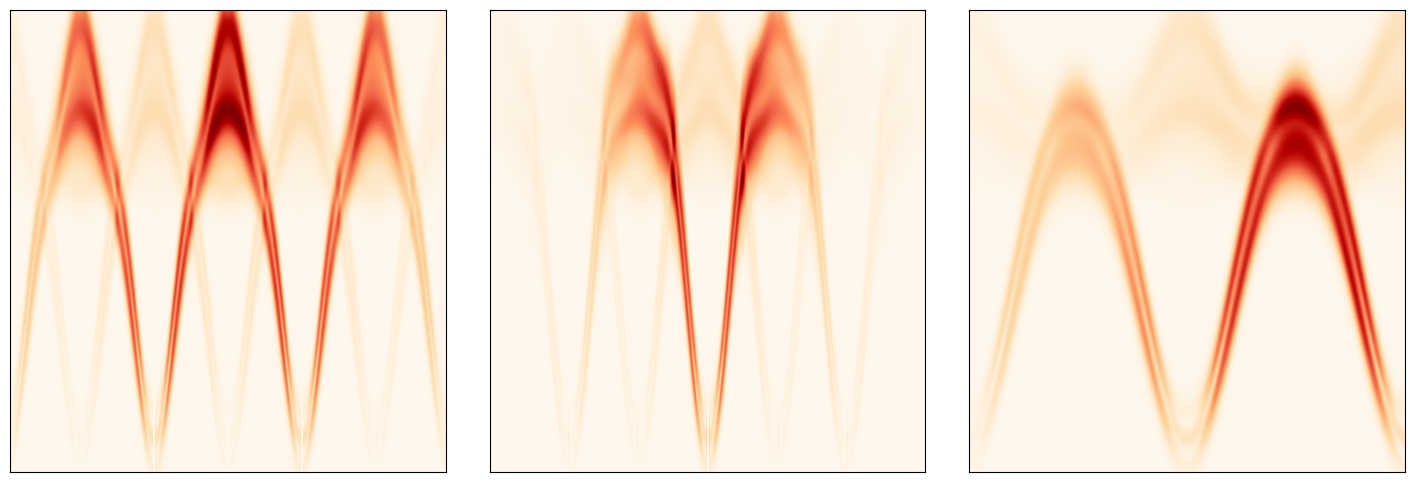

In [15]:
path = os.getcwd()
print(path)
with open(f'{path}/parameters/{num}/stat_model.pickle', 'rb') as file:
    p_res = pickle.load(file)
    
fig, ax = plt.subplots(nrows=1, ncols=Qpaths_num, figsize=(6*Qpaths_num,6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})

if Qpaths_num == 1:
    ax.imshow(p_res[i][0], aspect=0.6, vmax=0.00001, cmap='OrRd')
    ax.set_xticks([])
    ax.set_yticks([])
else:
    for i in range(Qpaths_num):
        ax[i].imshow(np.flipud(p_res[i][1]), aspect='auto', cmap='OrRd')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
plt.show()

In [16]:
print(f'fitted_parameters: {"_".join([str(round(i,4)) for i in para])}')
print(f'target_parameters: {"_".join([str(round(i,4)) for i in standard_array])}')
print(f'paras_differences: {"_".join([str(round(i,4)) for i in para-standard_array])}')
print(f'paras_differences in %: {"_".join([str(round(i,4)) for i in np.abs(para-standard_array)/np.abs(standard_array)*100])}')
print(f'lower_boundary: {[-4, -7, -4, -0.5, -0.5,  0,   0, -0.5,   0, -0.5,   0,  0]}')
print(f'higher_boundary: {[ 0,  0,  0,    0,    0,  2, 0.5,    0, 0.5,    0, 0.5,  6]}')
# print(f'Max value in therotical results: {np.max(ori_res)}')
# print(f'Max value in fitted results: {np.max(samples[1])}')
# print(f'rescale_paras_differences: {"_".join([str(round(i,4)) for i in np.abs(np.array(para)/para[-1]*standard_array[-1]-standard_array)])}')
# print(f'rescale_paras_differences in %: {"_".join([str(round(i,4)) for i in np.abs(np.array(para)/para[-1]*standard_array[-1]-standard_array)/np.abs(standard_array)*100])}')

fitted_parameters: -2.2681_-2.9646_-1.5363_-0.1667_-0.4236_0.0636_-0.4815_0.3355_5.8095
target_parameters: -1.9034_-3.3792_-1.6698_-0.0933_-0.0896_0.3665_-0.2932_0.31_3.0
paras_differences: -0.3647_0.4146_0.1335_-0.0734_-0.334_-0.3029_-0.1883_0.0255_2.8095
paras_differences in %: 19.162_12.27_7.9924_78.6904_372.779_82.6405_64.2246_8.2363_93.6493
lower_boundary: [-4, -7, -4, -0.5, -0.5, 0, 0, -0.5, 0, -0.5, 0, 0]
higher_boundary: [0, 0, 0, 0, 0, 2, 0.5, 0, 0.5, 0, 0.5, 6]


-2.158982156366719_-3.9165249244982476_-1.9244382915189577_-0.11010036831735504_-0.1011039558255637_0.44022461290178205_-0.3470249965647798_3.7022357124992054 

/work/projects/p0020541/Yixuan/SpinWave/Experment_test0
(87, 40)


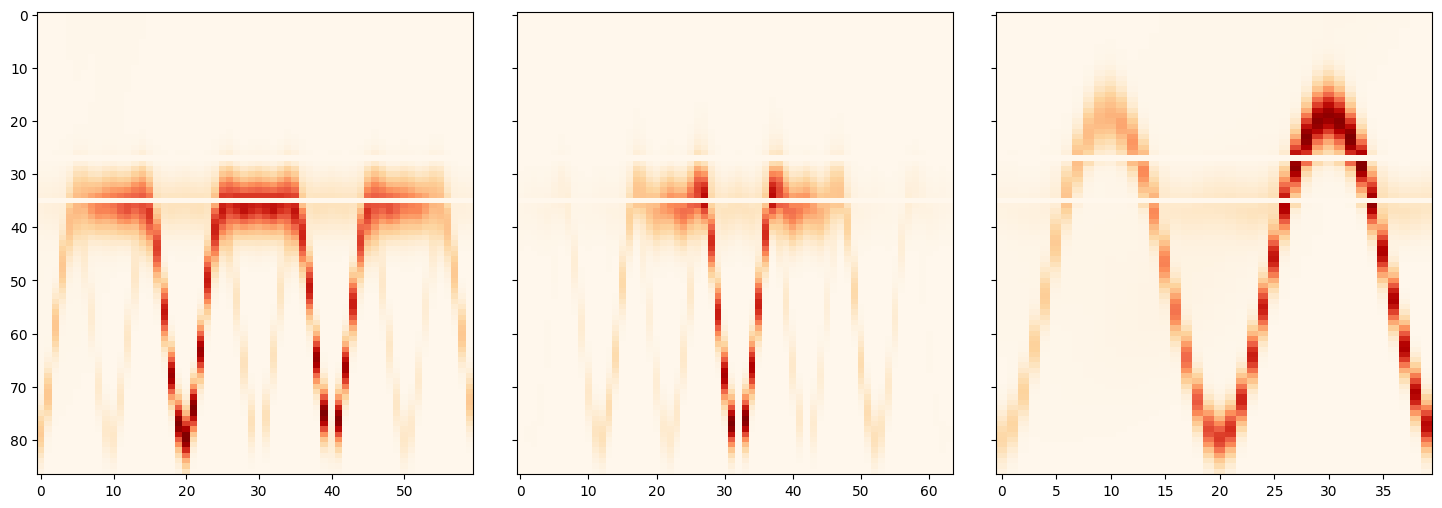

In [10]:
path = os.getcwd()
print(path)

pres = []
for i in range(3):
    with open(f'{path}/parameters/{num}/{i}_fsample.pickle', 'rb') as file:
        p_res = pickle.load(file)
    pres.append(p_res)

print(p_res.shape)
    
fig, ax = plt.subplots(nrows=1, ncols=Qpaths_num, figsize=(6*Qpaths_num,6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})

if Qpaths_num == 1:
    ax.imshow(p_res[i][0], aspect=0.6, cmap='OrRd')
    ax.set_xticks([])
    ax.set_yticks([])
else:
    for i in range(Qpaths_num):
        ax[i].imshow(np.flipud(pres[i]), aspect='auto', vmin=0, cmap='OrRd')
        # ax[i].set_xticks([])
        # ax[i].set_yticks([])
plt.show()

In [17]:
import os, shutil, time, pickle
import matplotlib.pyplot as plt
import numpy as np
from pyspinw import Matlab
m = Matlab(matlab_path="/shared/apps/matlab/R2023a", matlab_version='R2023a')
# Jfile = m.readtable('./SliceInfo/OptimizedJ_8.txt')
#Jfile = {'J1': -1.9034, 'J2':-3.3792, 'J3':-1.6698, 'J4':-0.093345, 'J5':-0.089593, 'J6':0, 'J7':0.36648, 'J8':-0.29315}   # 8 parameters
results = []
fit_para = para
rescaled_para = np.array(fit_para)/fit_para[-1]*standard_array[-1]

In [18]:
for i in [fit_para, rescaled_para, standard_array]:
    #para = np.array([-1.9034, -3.3792, -1.6698, -0.093345, -0.089593, 0.36648, -0.29315, 3])*i
    para = i
    print(para)
    
    csb = m.spinw()
    csb.genlattice('lat_const',[3.5126, 4.7457, 7.9171],'angled',[90, 90, 90],'sym','P m m n');
    csb.addatom('label','Cr3+','r',[1/4, 3/4, 0.37193],'S',3/2,'color','gray');
    csb.gencoupling('maxDistance',10)
    Jfile = {'J1': para[0], 'J2':para[1], 'J3':para[2], 'J4':para[3], 'J5':para[4], 'J6':0, 'J7':para[5], 'J8':para[6]} 
    print(Jfile.keys())
    for count, i in enumerate(Jfile.keys()):
        csb.addmatrix('value',Jfile[i],'label',i)
        csb.addcoupling('mat',i,'bond',count+1)
    
    csb.addmatrix('value', m.diag([0.0013, -0.0076, 0.0]),'label','Aniso')  # 2 parameters x, y
    csb.addaniso('Aniso')
    
    csb.addmatrix('label','DM1','value',1,'color','b')
    csb.addcoupling('mat','DM1','bond',1)
    csb.setmatrix('mat','DM1','pref',(0.31, 0, 0)) # 1 Parameters #0.31 for truth; 0.4 for open bond  
    
    csb.genmagstr('mode','direct','S',[[0, 0], [1, 1], [0, 0]],'n',[0, 0, 1],'k',[0,0,1/2])  #coupling
    csb.table('mat')
    
    #QQ = [[1, -3, 0.5], [1, 3, 0.5], 300]
    #QQ = [[-3, 1, 0.5], [3, 1, 0.5], 300]
    QQ = [[-2, 0, 0.5], [0, 2, 0.5], 300]
    
    csbSpec = csb.spinwave(QQ,'formfact',True)
    csbSpec = m.sw_neutron(csbSpec)
    csbSpec = m.sw_egrid(csbSpec,'component','Sperp', 'imagChk', False)
    
    csbSpec = m.sw_instrument(csbSpec, dE=para[7]) # 1 parameters
    
    res = np.flipud(csbSpec['swConv'].real)
    
    results.append(res)

[-2.475571702891678, -4.606314926801834, -2.2712865709864003, -0.1303733703486335, -0.11924696923735961, 0.49613288842187336, -0.39700586269300037, 4.065894805105861]
Creating the bond list (maxDistance = 10 Å, nCell = 3x3x2)...
...66 bonds are retained out of 560 generated!

dict_keys(['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8'])
> In spinw/genmagstr (line 280)
In call>eval_ans (line 98)
In call (line 40)
Calculating INCOMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 900, nTwin = 1)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.

Finite instrumental energy resolution is applied.

[-1.82658811 -3.39874626 -1.67585735 -0.09619533 -0.08798578  0.36606915
 -0.29292878  3.        ]
Creating the bond list (maxDistance = 10 Å, nCell = 3x3x2)...
.

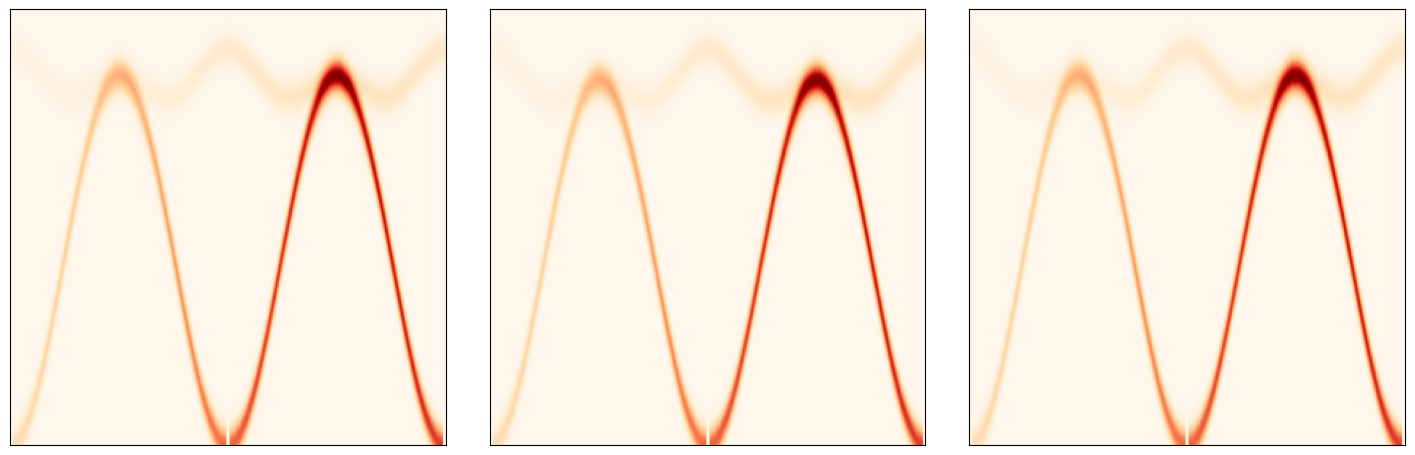

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=len(results), figsize=(6*len(results),6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})
for i in range(len(results)):
    ax[i].imshow(results[i], aspect=0.6, vmax=np.max(results[i]), cmap='OrRd')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

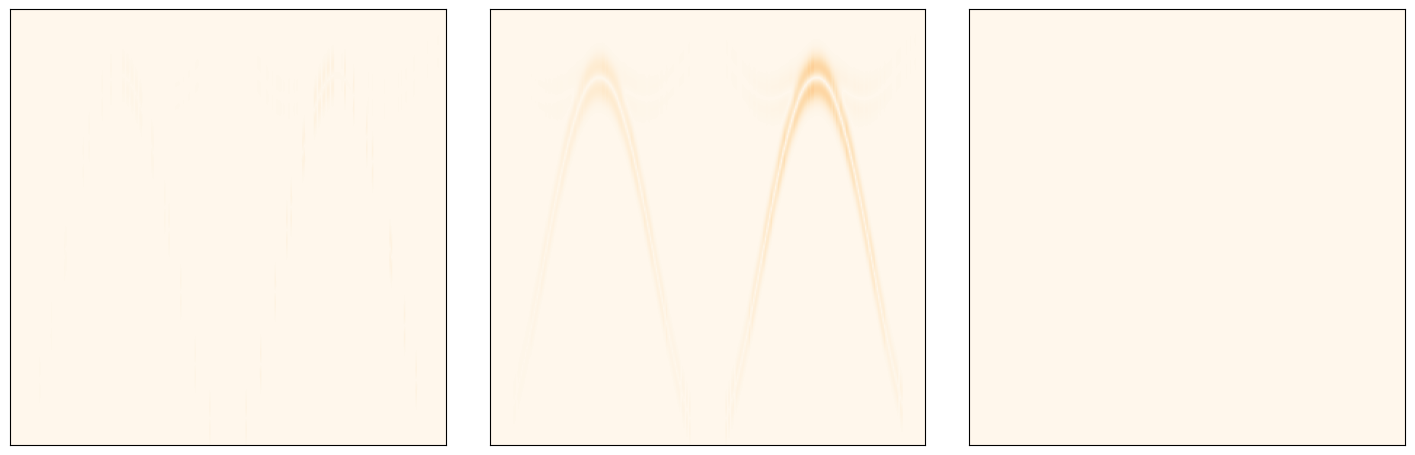

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=len(results), figsize=(6*len(results),6), sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0})
for i in range(len(results)):
    ax[i].imshow(np.abs(results[i]-results[2]), aspect=0.6, vmax=np.max(np.abs(results[2])), cmap='OrRd')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()